In [5]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.image import imread
import plotly
import random
import seaborn as sns
import joblib

In [6]:
train_dir_path = '../input/shopee-product-matching/train_images'
train_csv_path = '../input/shopee-product-matching/train.csv'
test_dir_path = '../input/shopee-product-matching/test_images'
test_csv_path = '../input/shopee-product-matching/test.csv'
RESULTS_PATH = '../input/shopee-competition-results/'

In [7]:
test_result_dict = joblib.load(RESULTS_PATH+'test_result_dict.pkl')
test_result_dict

{'resnet50_f1':     arcface  arcface_min2  arcface_inb   curface  curface_min2  curface_inb
 0  0.754504      0.759015     0.763479  0.745349      0.754114     0.757634
 1  0.757385      0.762153     0.766813  0.748712      0.751089     0.755284
 2  0.756016      0.760688     0.763971  0.727715      0.735701     0.738750
 3  0.754748      0.761924     0.766721  0.745469      0.751560     0.755471
 4  0.750931      0.759248     0.762747  0.747953      0.755956     0.757896,
 'resnet50_recall':     arcface  arcface_min2  arcface_inb   curface  curface_min2  curface_inb
 0  0.726135      0.737980     0.735445  0.700187      0.720058     0.717326
 1  0.719897      0.729491     0.731456  0.719728      0.732217     0.733465
 2  0.719139      0.729739     0.724357  0.679837      0.701474     0.696361
 3  0.711140      0.728862     0.732482  0.707077      0.722055     0.723288
 4  0.708940      0.729409     0.720646  0.704176      0.722531     0.720256,
 'resnet50_precision':     arcface  arcf

In [11]:
round(test_result_dict['resnet50_f1']['arcface'].max(),6)

0.757385

In [12]:
best_results = [[0 for i in range(3)] for j in range(5)]
best_results[0][0] = round(test_result_dict['resnet50_f1']['arcface'].max(),6)
best_results[0][1] = round(test_result_dict['resnet50_recall']['arcface'].max(),6)
best_results[0][2] = round(test_result_dict['resnet50_precision']['arcface'].max(),6)

best_results[1][0] = round(test_result_dict['resnext50_32x4d_f1']['arcface'].max(),6)
best_results[1][1] = round(test_result_dict['resnext50_32x4d_recall']['arcface'].max(),6)
best_results[1][2] = round(test_result_dict['resnext50_32x4d_precision']['arcface'].max(),6)

best_results[2][0] = round(test_result_dict['densenet121_f1']['arcface'].max(),6)
best_results[2][1] = round(test_result_dict['densenet121_recall']['arcface'].max(),6)
best_results[2][2] = round(test_result_dict['densenet121_precision']['arcface'].max(),6)

best_results[3][0] = round(test_result_dict['efficientnet_b3_f1']['arcface'].max(),6)
best_results[3][1] = round(test_result_dict['efficientnet_b3_recall']['arcface'].max(),6)
best_results[3][2] = round(test_result_dict['efficientnet_b3_precision']['arcface'].max(),6)

best_results[4][0] = round(test_result_dict['eca_nfnet_l0_f1']['arcface'].max(),6)
best_results[4][1] = round(test_result_dict['eca_nfnet_l0_recall']['arcface'].max(),6)
best_results[4][2] = round(test_result_dict['eca_nfnet_l0_precision']['arcface'].max(),6)

In [13]:
best_results_df = pd.DataFrame(best_results,columns=['f1','recall','precision'],index=['resnet50','resnext50_32x4d','densenet121','efficientnet_b3','eca_nfnet_l0'])
best_results_df

,f1,recall,precision
resnet50,0.757385,0.726135,0.925569
resnext50_32x4d,0.760473,0.731729,0.928756
densenet121,0.762457,0.739039,0.928803
efficientnet_b3,0.774103,0.764059,0.912719
eca_nfnet_l0,0.788663,0.771427,0.911394


In [14]:
# best_results_df.to_csv('image_best_results.csv')

In [34]:
resnet_hp_arcface = pd.DataFrame()

In [30]:
def round_six(row):
    return round(row,6)

In [32]:
test_result_dict['resnet50_f1']['arcface'].apply(round_six)

0    0.754504
1    0.757385
2    0.756016
3    0.754748
4    0.750931
Name: arcface, dtype: float64

In [35]:
resnet_hp_arcface['f1'] = test_result_dict['resnet50_f1']['arcface'].apply(round_six)
resnet_hp_arcface['recall'] = test_result_dict['resnet50_recall']['arcface'].apply(round_six)
resnet_hp_arcface['precision'] = test_result_dict['resnet50_precision']['arcface'].apply(round_six)

In [36]:
resnet_hp_arcface.index=[0.5,0.6,0.7,0.8,0.9]
resnet_hp_arcface

,f1,recall,precision
0.5,0.754504,0.726135,0.903717
0.6,0.757385,0.719897,0.916971
0.7,0.756016,0.719139,0.915644
0.8,0.754748,0.711140,0.925569
0.9,0.750931,0.708940,0.921425


In [37]:
# resnet_hp_arcface.to_csv('resnet_hp_arcface.csv')

In [38]:
resnet_hp_curface = pd.DataFrame()
resnet_hp_curface['f1'] = test_result_dict['resnet50_f1']['curface'].apply(round_six)
resnet_hp_curface['recall'] = test_result_dict['resnet50_recall']['curface'].apply(round_six)
resnet_hp_curface['precision'] = test_result_dict['resnet50_precision']['curface'].apply(round_six)
resnet_hp_curface.index=[0.5,0.6,0.7,0.8,0.9]
resnet_hp_curface

,f1,recall,precision
0.5,0.745349,0.700187,0.922990
0.6,0.748712,0.719728,0.901706
0.7,0.727715,0.679837,0.918415
0.8,0.745469,0.707077,0.912194
0.9,0.747953,0.704176,0.922249


In [40]:
# resnet_hp_curface.to_csv('resnet_hp_curface.csv')

In [41]:
resnext_hp_arcface = pd.DataFrame()
resnext_hp_arcface['f1'] = test_result_dict['resnext50_32x4d_f1']['arcface'].apply(round_six)
resnext_hp_arcface['recall'] = test_result_dict['resnext50_32x4d_recall']['arcface'].apply(round_six)
resnext_hp_arcface['precision'] = test_result_dict['resnext50_32x4d_precision']['arcface'].apply(round_six)
resnext_hp_arcface.index=[0.5,0.6,0.7,0.8,0.9]
resnext_hp_arcface.to_csv('resnext_hp_arcface.csv')
resnext_hp_arcface

,f1,recall,precision
0.5,0.758100,0.722231,0.916539
0.6,0.758061,0.714512,0.928729
0.7,0.755512,0.710143,0.928756
0.8,0.760473,0.731729,0.910224
0.9,0.760304,0.729586,0.911656


In [42]:
resnext_hp_curface = pd.DataFrame()
resnext_hp_curface['f1'] = test_result_dict['resnext50_32x4d_f1']['curface'].apply(round_six)
resnext_hp_curface['recall'] = test_result_dict['resnext50_32x4d_recall']['curface'].apply(round_six)
resnext_hp_curface['precision'] = test_result_dict['resnext50_32x4d_precision']['curface'].apply(round_six)
resnext_hp_curface.index=[0.5,0.6,0.7,0.8,0.9]
resnext_hp_curface.to_csv('resnext_hp_curface.csv')
resnext_hp_curface

,f1,recall,precision
0.5,0.748604,0.709426,0.917312
0.6,0.750406,0.721941,0.904924
0.7,0.750959,0.714287,0.915738
0.8,0.749053,0.710697,0.916441
0.9,0.751419,0.725628,0.900707


In [43]:
densenet_hp_arcface = pd.DataFrame()
densenet_hp_arcface['f1'] = test_result_dict['densenet121_f1']['arcface'].apply(round_six)
densenet_hp_arcface['recall'] = test_result_dict['densenet121_recall']['arcface'].apply(round_six)
densenet_hp_arcface['precision'] = test_result_dict['densenet121_precision']['arcface'].apply(round_six)
densenet_hp_arcface.index=[0.5,0.6,0.7,0.8,0.9]
densenet_hp_arcface.to_csv('densenet_hp_arcface.csv')
densenet_hp_arcface

,f1,recall,precision
0.5,0.760751,0.724906,0.919453
0.6,0.754631,0.714749,0.922519
0.7,0.760364,0.736673,0.904725
0.8,0.760973,0.719247,0.928803
0.9,0.762457,0.739039,0.904256


In [44]:
densenet_hp_curface = pd.DataFrame()
densenet_hp_curface['f1'] = test_result_dict['densenet121_f1']['curface'].apply(round_six)
densenet_hp_curface['recall'] = test_result_dict['densenet121_recall']['curface'].apply(round_six)
densenet_hp_curface['precision'] = test_result_dict['densenet121_precision']['curface'].apply(round_six)
densenet_hp_curface.index=[0.5,0.6,0.7,0.8,0.9]
densenet_hp_curface.to_csv('densenet_hp_curface.csv')
densenet_hp_curface

,f1,recall,precision
0.5,0.751954,0.711163,0.922425
0.6,0.746426,0.716050,0.904701
0.7,0.747276,0.702504,0.923014
0.8,0.753099,0.722143,0.908521
0.9,0.752115,0.715691,0.913441


In [45]:
efficientnet_hp_arcface = pd.DataFrame()
efficientnet_hp_arcface['f1'] = test_result_dict['efficientnet_b3_f1']['arcface'].apply(round_six)
efficientnet_hp_arcface['recall'] = test_result_dict['efficientnet_b3_recall']['arcface'].apply(round_six)
efficientnet_hp_arcface['precision'] = test_result_dict['efficientnet_b3_precision']['arcface'].apply(round_six)
efficientnet_hp_arcface.index=[0.5,0.6,0.7,0.8,0.9]
efficientnet_hp_arcface.to_csv('efficientnet_hp_arcface.csv')
efficientnet_hp_arcface

,f1,recall,precision
0.5,0.771322,0.758434,0.897510
0.6,0.770600,0.764059,0.889318
0.7,0.771648,0.747363,0.912719
0.8,0.770033,0.751042,0.905486
0.9,0.774103,0.758495,0.902920


In [46]:
efficientnet_hp_curface = pd.DataFrame()
efficientnet_hp_curface['f1'] = test_result_dict['efficientnet_b3_f1']['curface'].apply(round_six)
efficientnet_hp_curface['recall'] = test_result_dict['efficientnet_b3_recall']['curface'].apply(round_six)
efficientnet_hp_curface['precision'] = test_result_dict['efficientnet_b3_precision']['curface'].apply(round_six)
efficientnet_hp_curface.index=[0.5,0.6,0.7,0.8,0.9]
efficientnet_hp_curface.to_csv('efficientnet_hp_curface.csv')
efficientnet_hp_curface

,f1,recall,precision
0.5,0.777180,0.763746,0.900115
0.6,0.764622,0.738881,0.910981
0.7,0.762334,0.725346,0.925027
0.8,0.771006,0.742574,0.917921
0.9,0.770161,0.742454,0.916254


In [47]:
nfnet_hp_arcface = pd.DataFrame()
nfnet_hp_arcface['f1'] = test_result_dict['eca_nfnet_l0_f1']['arcface'].apply(round_six)
nfnet_hp_arcface['recall'] = test_result_dict['eca_nfnet_l0_recall']['arcface'].apply(round_six)
nfnet_hp_arcface['precision'] = test_result_dict['eca_nfnet_l0_precision']['arcface'].apply(round_six)
nfnet_hp_arcface.index=[0.5,0.6,0.7,0.8,0.9]
nfnet_hp_arcface.to_csv('nfnet_hp_arcface.csv')
nfnet_hp_arcface

,f1,recall,precision
0.5,0.778099,0.760411,0.906291
0.6,0.781083,0.769113,0.900302
0.7,0.781168,0.769050,0.902243
0.8,0.780730,0.769754,0.900319
0.9,0.788663,0.771427,0.911394


In [48]:
nfnet_hp_curface = pd.DataFrame()
nfnet_hp_curface['f1'] = test_result_dict['eca_nfnet_l0_f1']['curface'].apply(round_six)
nfnet_hp_curface['recall'] = test_result_dict['eca_nfnet_l0_recall']['curface'].apply(round_six)
nfnet_hp_curface['precision'] = test_result_dict['eca_nfnet_l0_precision']['curface'].apply(round_six)
nfnet_hp_curface.index=[0.5,0.6,0.7,0.8,0.9]
nfnet_hp_curface.to_csv('nfnet_hp_curface.csv')
nfnet_hp_curface

,f1,recall,precision
0.5,0.777439,0.755358,0.911029
0.6,0.778386,0.755153,0.913138
0.7,0.777702,0.747418,0.920800
0.8,0.779186,0.751721,0.917939
0.9,0.778731,0.744829,0.926952


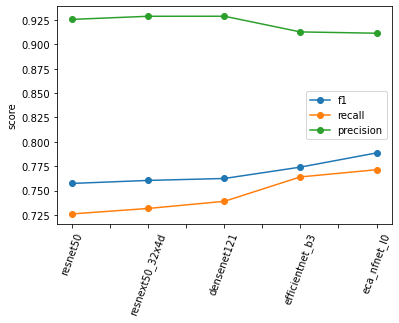

In [49]:
ax = best_results_df.plot(marker='o',ylabel='score',rot=70)
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/best_results_df.pdf',pad_inches=0,bbox_inches='tight')

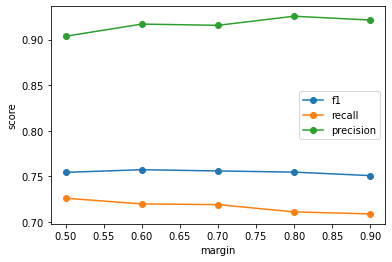

In [50]:
ax = resnet_hp_arcface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/resnet_hp_arcface.pdf',pad_inches=0,bbox_inches='tight')

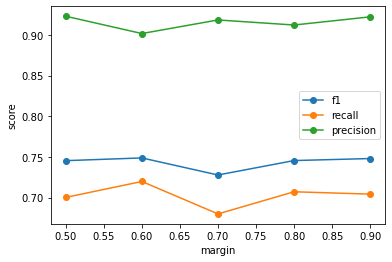

In [51]:
ax = resnet_hp_curface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/resnet_hp_curface.pdf',pad_inches=0,bbox_inches='tight')

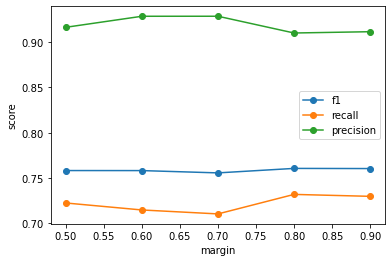

In [52]:
ax = resnext_hp_arcface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/resnext_hp_arcface.pdf',pad_inches=0,bbox_inches='tight')

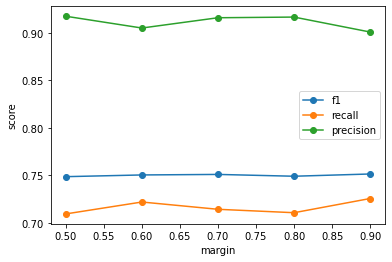

In [53]:
ax = resnext_hp_curface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/resnext_hp_curface.pdf',pad_inches=0,bbox_inches='tight')

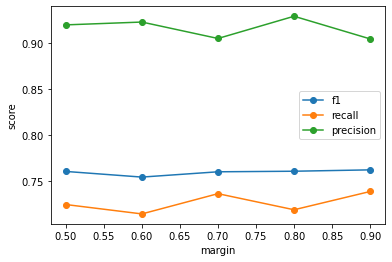

In [54]:
ax = densenet_hp_arcface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/densenet_hp_arcface.pdf',pad_inches=0,bbox_inches='tight')

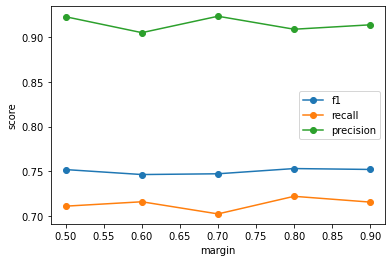

In [55]:
ax = densenet_hp_curface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/densenet_hp_curface.pdf',pad_inches=0,bbox_inches='tight')

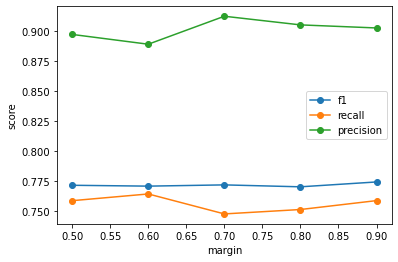

In [56]:
ax = efficientnet_hp_arcface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/efficientnet_hp_arcface.pdf',pad_inches=0,bbox_inches='tight')

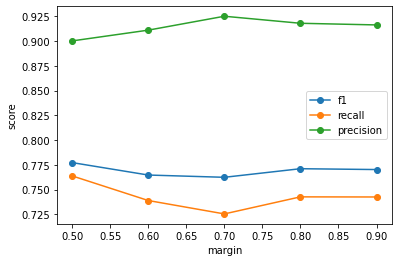

In [57]:
ax = efficientnet_hp_curface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/efficientnet_hp_curface.pdf',pad_inches=0,bbox_inches='tight')

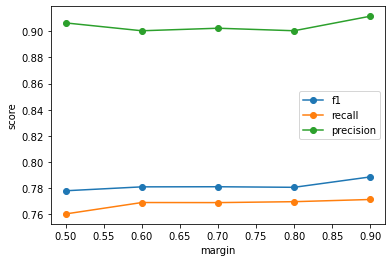

In [58]:
ax = nfnet_hp_arcface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/nfnet_hp_arcface.pdf',pad_inches=0,bbox_inches='tight')

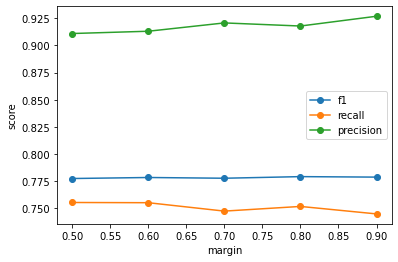

In [59]:
ax = nfnet_hp_curface.plot(marker='o',xlabel='margin',ylabel='score')
# plt.legend(loc='center left')
fig = ax.get_figure()
fig.savefig('../doc/figures/nfnet_hp_curface.pdf',pad_inches=0,bbox_inches='tight')